In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("CorporateCredit(preprocessed).csv", index_col=0, dtype={'cik': str, 'sic_1': str})
df.head()

,cik,sector,sic_1,current_ratio_pos,current_ratio_neg,long_term_debt_capital_pos,long_term_debt_capital_neg,debt_equity_ratio_pos,debt_equity_ratio_neg,gross_margin_pos,...,roa_return_on_assets_neg,roi_return_on_investment_pos,roi_return_on_investment_neg,operating_cash_flow_per_share_pos,operating_cash_flow_per_share_neg,free_cash_flow_per_share_pos,free_cash_flow_per_share_neg,rating,rating_int_17,rating_int_23
0,1056903,Utils,4,0.765793,0.0,0.375075,0.0,0.633769,0.0,4.364664,...,0.0,1.696166,0.0,1.097178,0.00000,0.000000,0.125134,A-,10,16
1,8670,BusEq,7,0.748061,0.0,0.007174,0.0,0.007273,0.0,3.799121,...,0.0,3.130110,0.0,0.223224,0.00000,0.272467,0.000000,AAA,16,22
2,8858,Shops,5,1.074183,0.0,0.256501,0.0,0.354523,0.0,2.557289,...,0.0,2.365504,0.0,0.000000,2.15268,0.000000,2.119035,BBB-,7,13
3,1035201,Utils,4,0.607480,0.0,0.385806,0.0,0.667368,0.0,4.182197,...,0.0,1.808584,0.0,1.009344,0.00000,0.000000,0.641801,AA-,13,19
4,721371,Shops,5,0.829905,0.0,0.234598,0.0,0.339040,0.0,1.576605,...,0.0,2.217506,0.0,1.089403,0.00000,1.228880,0.000000,A,11,17


In [15]:
df_g17 = df.drop(columns=['rating', 'rating_int_23'])

In [8]:
import pycaret.classification as crt_clf

In [19]:
clf_setup = crt_clf.setup(df_g17,
              session_id = 2024,
              fix_imbalance_method = 'SMOTE',
              remove_multicollinearity = True,
              multicollinearity_threshold = 0.8,
              )



params = """
로그 변환 or 정규화

fix_imbalance=True
fix_imbalance_method = 'SMOTE'
polynomial_features=True
drop_groups = ['col1', 'col2']
remove_multicollinearity = True
multicollinearity_threshold = 0.9
remove_outliers = True
outliers_method = 'lof'
feature_selection = True
https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection
"""

,Description,Value
0,Session id,2024
1,Target,rating_int_17
2,Target type,Multiclass
3,Original data shape,"(7805, 36)"
4,Transformed data shape,"(7805, 42)"
5,Transformed train set shape,"(5463, 42)"
6,Transformed test set shape,"(2342, 42)"
7,Numeric features,32
8,Categorical features,3
9,Preprocess,True


In [20]:
best_model = crt_clf.compare_models()
# best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.4666,0.8939,0.4666,0.4682,0.4642,0.4213,0.4217,5.9430
lightgbm,Light Gradient Boosting Machine,0.4648,0.8922,0.4648,0.4667,0.4627,0.4196,0.4199,7.0060
rf,Random Forest Classifier,0.4618,0.8632,0.4618,0.4638,0.4597,0.4159,0.4163,1.7890
et,Extra Trees Classifier,0.4541,0.8019,0.4541,0.4556,0.4518,0.4077,0.4080,1.3260
dt,Decision Tree Classifier,0.4395,0.7653,0.4395,0.4412,0.4369,0.3918,0.3922,0.4300
gbc,Gradient Boosting Classifier,0.4292,0.0000,0.4292,0.4317,0.4263,0.3807,0.3813,37.0730
knn,K Neighbors Classifier,0.3708,0.7915,0.3708,0.3737,0.3678,0.3167,0.3172,0.8620
lr,Logistic Regression,0.3095,0.0000,0.3095,0.3076,0.2991,0.2467,0.2478,4.2320
lda,Linear Discriminant Analysis,0.2868,0.0000,0.2868,0.2906,0.2787,0.2234,0.2245,0.2790
ridge,Ridge Classifier,0.2242,0.0000,0.2242,0.2134,0.1989,0.1474,0.1500,0.2810


In [21]:
tuned_model = crt_clf.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4954,0.9066,0.4954,0.4998,0.4943,0.4523,0.4527
1,0.4826,0.9041,0.4826,0.4875,0.4809,0.4387,0.4392
2,0.4863,0.9029,0.4863,0.4873,0.4847,0.4425,0.4427
3,0.4432,0.8929,0.4432,0.4397,0.4375,0.3952,0.3957
4,0.4469,0.8994,0.4469,0.4505,0.4438,0.4001,0.4008
5,0.4597,0.8978,0.4597,0.4623,0.4569,0.4131,0.4134
6,0.4432,0.8793,0.4432,0.4434,0.4401,0.3958,0.3961
7,0.4469,0.8900,0.4469,0.4500,0.4460,0.4004,0.4007
8,0.4725,0.9019,0.4725,0.4755,0.4714,0.4278,0.4280


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
crt_clf.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

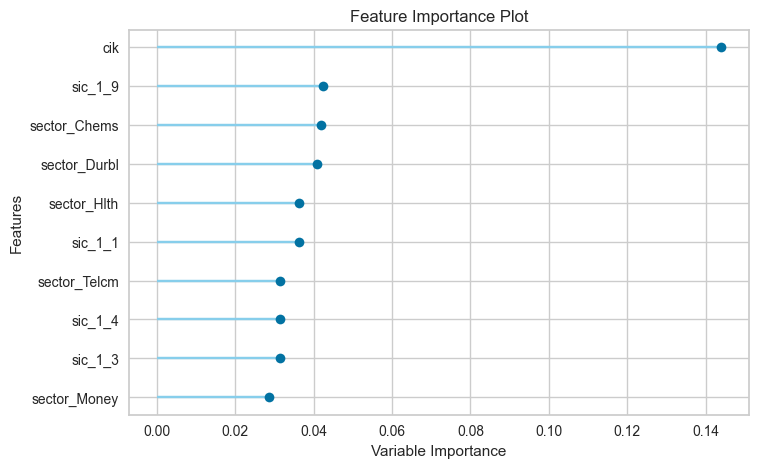

In [23]:
crt_clf.plot_model(tuned_model, plot='feature')

In [24]:
tuned_model.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 2024,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

In [43]:
df_g17 = df_g17.drop(columns='cik')

In [44]:
clf_setup = crt_clf.setup(df_g17,
                          session_id = 2024,
                          fix_imbalance_method = 'SMOTE',
                          remove_multicollinearity = True,
                          multicollinearity_threshold = 0.8)


,Description,Value
0,Session id,2024
1,Target,rating_int_17
2,Target type,Multiclass
3,Original data shape,"(7805, 35)"
4,Transformed data shape,"(7805, 41)"
5,Transformed train set shape,"(5463, 41)"
6,Transformed test set shape,"(2342, 41)"
7,Numeric features,32
8,Categorical features,2
9,Preprocess,True


In [45]:
best_model = crt_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4463,0.8378,0.4463,0.4485,0.4438,0.3987,0.3991,2.6400
et,Extra Trees Classifier,0.4422,0.7980,0.4422,0.4438,0.4402,0.3947,0.3950,2.1230
xgboost,Extreme Gradient Boosting,0.4410,0.8512,0.4410,0.4421,0.4379,0.3932,0.3936,13.6230
lightgbm,Light Gradient Boosting Machine,0.4395,0.8483,0.4395,0.4420,0.4370,0.3917,0.3921,15.2230
dt,Decision Tree Classifier,0.4164,0.7488,0.4164,0.4194,0.4146,0.3670,0.3673,0.9280
gbc,Gradient Boosting Classifier,0.3849,0.0000,0.3849,0.3877,0.3809,0.3307,0.3315,49.5800
knn,K Neighbors Classifier,0.3469,0.7668,0.3469,0.3473,0.3434,0.2912,0.2917,0.5650
lr,Logistic Regression,0.2143,0.0000,0.2143,0.2169,0.2042,0.1414,0.1425,5.1840
lda,Linear Discriminant Analysis,0.1944,0.0000,0.1944,0.1938,0.1841,0.1239,0.1249,0.4540
ridge,Ridge Classifier,0.1841,0.0000,0.1841,0.1782,0.1631,0.1029,0.1049,0.3320


In [46]:
tuned_model = crt_clf.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2102,0.7614,0.2102,0.2763,0.1827,0.1247,0.1317
1,0.2322,0.7850,0.2322,0.2814,0.2044,0.1489,0.1579
2,0.2614,0.7825,0.2614,0.3217,0.2303,0.1813,0.1914
3,0.1923,0.7561,0.1923,0.1918,0.1581,0.1050,0.1107
4,0.2289,0.7870,0.2289,0.2799,0.1918,0.1480,0.1552
5,0.2198,0.7626,0.2198,0.2772,0.1817,0.1331,0.1413
6,0.2454,0.7651,0.2454,0.2557,0.2089,0.1643,0.1720
7,0.2381,0.7630,0.2381,0.2937,0.2106,0.1574,0.1653
8,0.2399,0.7765,0.2399,0.2886,0.2056,0.1587,0.1666


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
crt_clf.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

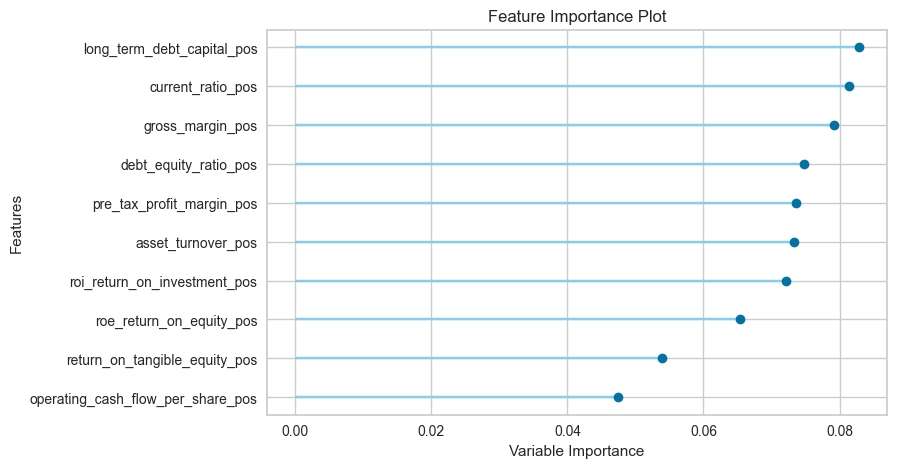

In [48]:
crt_clf.plot_model(tuned_model, plot='feature')

In [49]:
tuned_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

In [25]:
def grade_17_to_6(g17):
    if g17 == 0:
        return 0
    elif g17 < 4:
        return 1
    elif g17 < 7:
        return 2
    elif g17 < 10:
        return 3
    elif g17 < 13:
        return 4
    else:
        return 5

In [28]:
df['rating_int_6'] = df.apply(lambda x: grade_17_to_6(x['rating_int_17']), axis=1)

In [30]:
df_g6 = df.drop(columns=['cik', 'rating_int_23', 'rating_int_17', 'rating'])

In [33]:
clf_setup = crt_clf.setup(df_g6,
                          session_id = 2024,
                          fix_imbalance_method = 'SMOTE',
                          remove_multicollinearity = True,
                          multicollinearity_threshold = 0.8)

,Description,Value
0,Session id,2024
1,Target,rating_int_6
2,Target type,Multiclass
3,Original data shape,"(7805, 35)"
4,Transformed data shape,"(7805, 41)"
5,Transformed train set shape,"(5463, 41)"
6,Transformed test set shape,"(2342, 41)"
7,Numeric features,32
8,Categorical features,2
9,Preprocess,True


In [34]:
best_model = crt_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6806,0.8698,0.6806,0.6821,0.6796,0.5859,0.5864,1.0550
rf,Random Forest Classifier,0.6751,0.8923,0.6751,0.6758,0.6735,0.5777,0.5784,1.5320
xgboost,Extreme Gradient Boosting,0.6714,0.8916,0.6714,0.6716,0.6700,0.5739,0.5744,2.3480
lightgbm,Light Gradient Boosting Machine,0.6681,0.8928,0.6681,0.6688,0.6667,0.5692,0.5698,2.6210
dt,Decision Tree Classifier,0.6570,0.8248,0.6570,0.6577,0.6559,0.5561,0.5566,0.4410
gbc,Gradient Boosting Classifier,0.5999,0.0000,0.5999,0.6064,0.5956,0.4730,0.4760,10.4540
knn,K Neighbors Classifier,0.5768,0.8263,0.5768,0.5783,0.5758,0.4510,0.4515,0.6050
lr,Logistic Regression,0.4364,0.0000,0.4364,0.4386,0.4252,0.2505,0.2534,5.1030
lda,Linear Discriminant Analysis,0.4144,0.0000,0.4144,0.4161,0.4069,0.2299,0.2328,0.2100
ada,Ada Boost Classifier,0.4135,0.0000,0.4135,0.4133,0.4050,0.2350,0.2376,0.7220


In [35]:
tuned_model = crt_clf.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3876,0.7376,0.3876,0.3887,0.2985,0.1342,0.1865
1,0.4241,0.7550,0.4241,0.4636,0.3385,0.1966,0.2491
2,0.3784,0.7502,0.3784,0.4138,0.2958,0.1264,0.1690
3,0.3810,0.7446,0.3810,0.3833,0.2951,0.1298,0.1777
4,0.4029,0.7504,0.4029,0.4711,0.3150,0.1614,0.2138
5,0.4011,0.7635,0.4011,0.4574,0.3154,0.1586,0.2077
6,0.3938,0.7448,0.3938,0.4288,0.3156,0.1503,0.1925
7,0.3736,0.7690,0.3736,0.3507,0.2727,0.1222,0.1645
8,0.3919,0.7441,0.3919,0.3625,0.3035,0.1460,0.1927


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
crt_clf.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

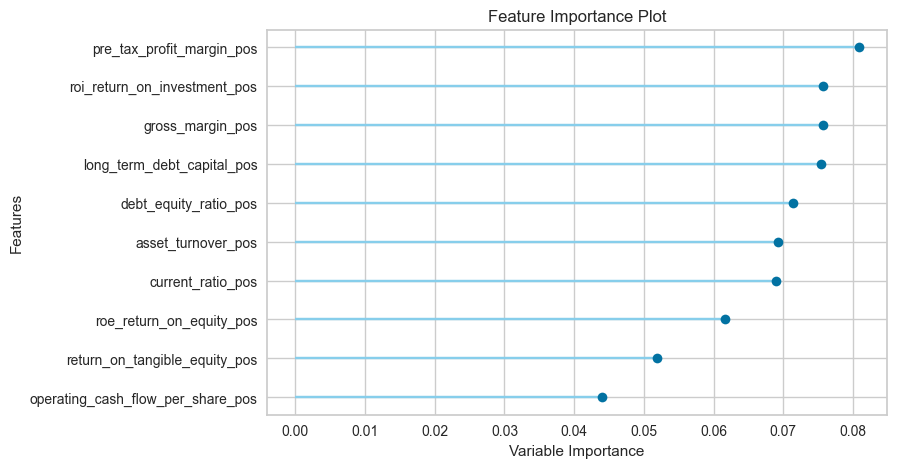

In [37]:
crt_clf.plot_model(tuned_model, plot='feature')

In [38]:
tuned_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

In [39]:
# extend_tuned_model = crt_clf.tune_model(best_model, n_iter=300, search_library='scikit-optimize', search_algorithm='bayesian')

In [40]:
# crt_clf.evaluate_model(extend_tuned_model)

In [41]:
# crt_clf.save_model(extend_tuned_model, 'extra_trees_clf(extend)')